In [17]:
%matplotlib widget
# other options for matplotlib are: `widget`, `ipympl`, `notebook`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
column_names = ['atom', 'x', 'y', 'z']
df = pd.read_csv('./reference_files/sI_5-12_6-2_cage.xyz',
                 sep='\s+',
                 names=column_names,
                 skiprows=2)
# the `sep='\s+` is necessary because I want to use whitespace
# as the separator and not just `sep=" "`

In [3]:
df

,atom,x,y,z
0,O,0.000000,0.000000,3.006068
1,O,-0.000000,-0.000000,-3.006069
2,O,0.000000,2.320779,1.421994
3,O,0.000000,2.320779,-1.422006
4,O,-0.000000,-2.320779,1.421994
5,O,-0.000000,-2.320779,-1.422006
6,O,6.015000,3.006068,0.000000
7,O,6.015000,-3.006069,0.000000
8,O,6.015000,1.421994,2.320779
9,O,6.015000,-1.422006,2.320779


[ 3.006068 -3.006069  1.421994 -1.422006  1.421994 -1.422006]


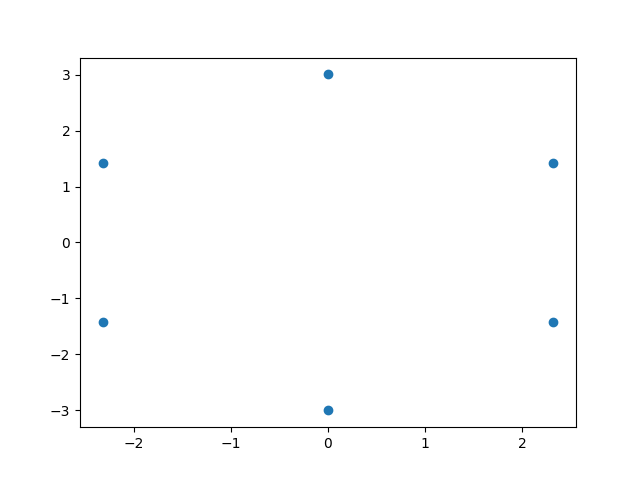

In [6]:
# Select a given plane to isolate based on a common x/y/z coordinate
x_plane_pts = np.array([[df.iloc[i]['y'], df.iloc[i]['z']] for i in range(len(df['x'])) if df.iloc[i]['x'] == 0.0])
x_plane_y = np.array([x_plane_pts[i][0] for i in range(len(x_plane_pts))])
x_plane_z = np.array([x_plane_pts[i][1] for i in range(len(x_plane_pts))])
print(x_plane_z)

# Plot the points on the isolated plane
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x_plane_y, x_plane_z,
           marker='o')

In [7]:
## Adapted from GeeksForGeeks: Quickhull Algorithm for Convex Hull, https://www.geeksforgeeks.org/quickhull-algorithm-convex-hull/ 

# Initialise the convex hull set
hull = set()

In [8]:
# Compute the side of the line PQ which the point p is on
def find_side(P, Q, p):
    # Caluclate the signed distance
    dist_sign = (p[1] - P[1]) * (Q[0] - P[0]) - (Q[1] - P[1]) * (p[0] - P[0])
    
    if dist_sign < 0:
        return -1
    elif dist_sign > 0:
        return 1
    
    return 0

In [9]:
# p is the point considered, P & Q are the points of the line 
def abs_dist(P, Q, p):
    return abs((p[1] - P[1]) * (Q[0] - P[0]) -
               (Q[1] - P[1]) * (p[0] - P[0]))

In [12]:
def quickHull(S, n, P, Q, side):
    idx = -1 
    max_dist = 0

    # Find the point with the max distance from the line PQ
    for i in range(n):
        # Compute the absolute distance between PQ and p
        tmp = abs_dist(P, Q, S[i])

        # Check if the point on the side we are looking at and if it has the largest distance
        if (find_side(P, Q, S[i]) == side) and (tmp > max_dist):
            # If it does, then replace it
            idx = i
            max_dist = tmp

    # If there are no points left, add the end points of the separating line to the convex hull set
    if idx == - 1:
        hull.add("$".join(map(str, P)))
        hull.add("$".join(map(str, Q)))
        return
    
    # Recursively call quickhull on the segmet between the end points P and Q and the maximum dist
    quickHull(S, n, S[idx], P, -find_side(P, Q, S[idx])) # Call quickhull on Pp
    quickHull(S, n, S[idx], Q, -find_side(Q, P, S[idx])) # Call quickhull on Qp


In [13]:
def printHull(S, n):
    if (n < 3):
        print("Convex hull not possible")
        return
 
    # Find the points with minimum and maximum x-axis coordinate
    min_x = 0
    max_x = 0
    for i in range(1, n):
        if S[i][0] < S[min_x][0]:
            min_x = i
        if S[i][0] > S[max_x][0]:
            max_x = i
 
    # Find the convex hull points on one side of line joining S[min_x] and a[max_x]
    quickHull(S, n, S[min_x], S[max_x], 1)
 
    # Recursively find convex hull points on
    # other side of line joining a[min_x] and
    # a[max_x]
    quickHull(S, n, S[min_x], S[max_x], -1)
 
    print("The points in Convex Hull are:")
     
    for element in hull:
        x = element.split("$")
        print("(", x[0], ",", x[1], ") ", end = " ")

In [14]:
# The hull is in the order of the points examined 
printHull(x_plane_pts, len(x_plane_pts))

The points in Convex Hull are:
( 0.0 , 3.006068 )  ( -0.0 , -3.006069 )  ( -2.320779 , 1.421994 )  ( -2.320779 , -1.422006 )  ( 2.320779 , 1.421994 )  ( 2.320779 , -1.422006 )  

7


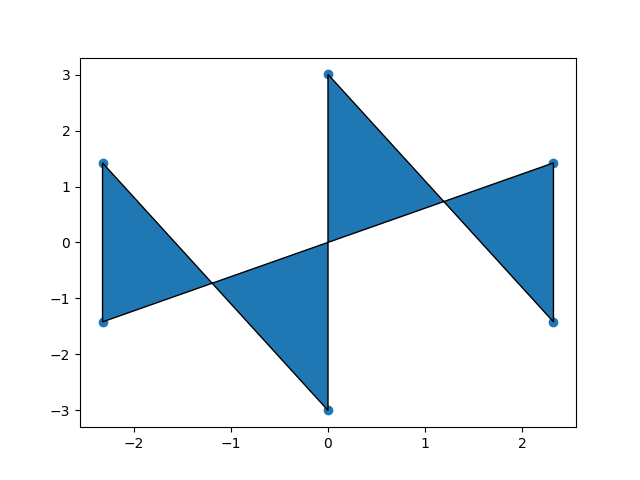

In [44]:
# Display connected points

# Display the isolated points on the plane
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x_plane_y, x_plane_z,
           marker='o')

# Display the edges connecting the verticies of the convex hull
codes = [Path.LINETO for i in range(len(hull) - 1)]
codes.insert(0, Path.MOVETO)
codes.append(Path.CLOSEPOLY)

# FIX
verts = []
count = 0
for elem in hull:
    count += 1
    x, y = float(elem.split("$")[0]), float(elem.split("$")[1])
    coord = (x, y)
    verts.append(coord)

    if count == 1:
        starting_point = coord

    if count == len(hull):
        verts.append(starting_point)

print((len(codes)))
path = Path(verts, codes)

patch = patches.PathPatch(path, lw=1)
ax.add_patch(patch)

plt.show()
